## 1. Importing Python Libraries

We shall start by importing the essential Python libraries

In [1]:
### IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Shekhar
[nltk_data]     Lamba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Shekhar
[nltk_data]     Lamba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 2. Importing, Cleaning and Merging Datasets

We now apply the same process that we had used previously to get the dataframe _df_. 

In [2]:
### USING THE FOUR DATASETS TO GET THE DATAFRAME DF
tmdb_movies = pd.read_csv('tmdb_movies_data.csv')
tmdb_genres = pd.read_csv('tmdb_genres.csv')
tmdb_directors = pd.read_csv('tmdb_directors.csv')
tmdb_actors = pd.read_csv('tmdb_actors.csv')

tmdb_movies_updated = tmdb_movies.drop(['adult', 'backdrop_path', 'genre_ids', 'original_title', 'poster_path', 'video'], axis = 1)

new_title = []
for name in range(0, len(tmdb_movies_updated)):
    title = tmdb_movies_updated['title'][name]
    title = str(title)
    title = re.sub(r'[^\w\s]+', '', title)
    new_title.append(title)
tmdb_movies_updated['title'] = new_title

tmdb_movies_updated['genre_1'] = tmdb_genres['genre_1']
tmdb_movies_updated['genre_2'] = tmdb_genres['genre_2']

tmdb_movies_updated = tmdb_movies_updated.merge(tmdb_directors, left_on = 'id', right_on = 'id')

df = tmdb_movies_updated.merge(tmdb_actors, left_on = 'id', right_on = 'id')
df

,id,original_language,overview,popularity,release_date,title,vote_average,vote_count,genre_1,genre_2,director,actor_1,actor_2,actor_3,actor_4,actor_5
0,19404,hi,"Raj is a rich, carefree, happy-go-lucky second...",24.222,1995-10-20,Dilwale Dulhania Le Jayenge,8.7,3253,Comedy,Drama,Aditya Chopra,Shah Rukh Khan,Kajol,Amrish Puri,Anupam Kher,Satish Shah
1,278,en,Framed in the 1940s for the double murder of h...,67.359,1994-09-23,The Shawshank Redemption,8.7,20172,Drama,Crime,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,Clancy Brown
2,238,en,"Spanning the years 1945 to 1955, a chronicle o...",62.603,1972-03-14,The Godfather,8.7,15112,Drama,Crime,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Robert Duvall,Richard S. Castellano
3,724089,en,Professor Gabriel Emerson finally learns the t...,10.796,2020-07-31,Gabriels Inferno Part II,8.7,1334,Romance,None,Tosca Musk,Melanie Zanetti,Giulio Berruti,James Andrew Fraser,Margaux Brooke,Agnes Albright
4,761053,en,The final part of the film adaption of the ero...,34.804,2020-11-19,Gabriels Inferno Part III,8.6,901,Romance,Comedy,Tosca Musk,Melanie Zanetti,Giulio Berruti,Rhett Wellington,James Andrew Fraser,Margaux Brooke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,12142,en,Edward Carnby is a private investigator specia...,14.365,2005-01-28,Alone in the Dark,3.2,429,Action,Fantasy,Uwe Boll,Christian Slater,Tara Reid,Stephen Dorff,Will Sanderson,Ona Grauer
9356,5491,en,"In the year 3000, man is no match for the Psyc...",8.795,2000-05-12,Battlefield Earth,3.2,621,Action,Adventure,Roger Christian,John Travolta,Barry Pepper,Forest Whitaker,Kim Coates,Sabine Karsenti
9357,11059,en,"Set on an island off the coast, a techno rave ...",10.019,2003-04-11,House of the Dead,3.2,280,Horror,Action,Uwe Boll,Jonathan Cherry,Tyron Leitso,Clint Howard,Ona Grauer,Michael Eklund
9358,14164,en,The young warrior Son Goku sets out on a quest...,50.279,2009-03-12,Dragonball Evolution,2.9,1567,Action,Adventure,James Wong,Justin Chatwin,Chow Yun-Fat,Joon Park,Jamie Chung,Emmy Rossum


## 3. Data Exploration and Manipulation

Next, let us check the datatypes of the columns in _df_.

In [3]:
df.dtypes

id                     int64
original_language     object
overview              object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
genre_1               object
genre_2               object
director              object
actor_1               object
actor_2               object
actor_3               object
actor_4               object
actor_5               object
dtype: object

### a) Average Movie Scores
Let us plot the average movie scores as voted by the viewers.

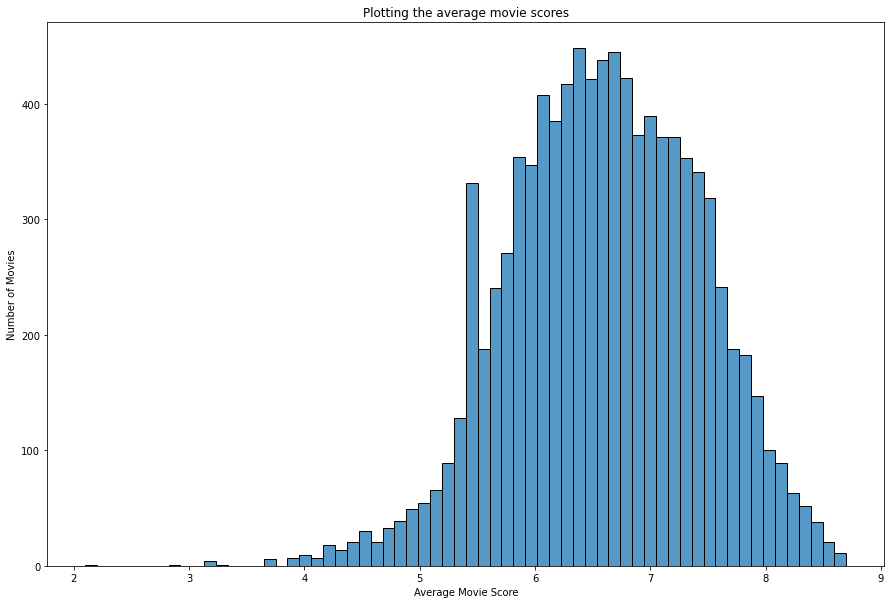

In [4]:
### PLOTTING THE AVERAGE MOVIE SCORES VOTED BY THE VIEWERS
plt.figure(figsize = (15, 10))
sns.histplot(x = 'vote_average', data = df)
plt.title('Plotting the average movie scores')
plt.xlabel('Average Movie Score')
plt.ylabel('Number of Movies')
plt.show()

We see that most of the movies received an average score between 6 and 7. Now let us make a new feature by binning these average scores. We label the average scores between 2 and 3 as _'G'_, between 3 and 4 as _'F'_,..., between 7 and 8 as _'B'_, and between 8 and 9 as _'A'_.

In [5]:
### BINNING THE AVERAGE MOVIE SCORES
df['vote_score_bins'] = pd.cut(df['vote_average'], bins = [2, 3, 4, 5, 6, 7, 8, 9], 
                               labels = ['G', 'F', 'E', 'D', 'C', 'B', 'A'], right = False)
df

,id,original_language,overview,popularity,release_date,title,vote_average,vote_count,genre_1,genre_2,director,actor_1,actor_2,actor_3,actor_4,actor_5,vote_score_bins
0,19404,hi,"Raj is a rich, carefree, happy-go-lucky second...",24.222,1995-10-20,Dilwale Dulhania Le Jayenge,8.7,3253,Comedy,Drama,Aditya Chopra,Shah Rukh Khan,Kajol,Amrish Puri,Anupam Kher,Satish Shah,A
1,278,en,Framed in the 1940s for the double murder of h...,67.359,1994-09-23,The Shawshank Redemption,8.7,20172,Drama,Crime,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,Clancy Brown,A
2,238,en,"Spanning the years 1945 to 1955, a chronicle o...",62.603,1972-03-14,The Godfather,8.7,15112,Drama,Crime,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Robert Duvall,Richard S. Castellano,A
3,724089,en,Professor Gabriel Emerson finally learns the t...,10.796,2020-07-31,Gabriels Inferno Part II,8.7,1334,Romance,None,Tosca Musk,Melanie Zanetti,Giulio Berruti,James Andrew Fraser,Margaux Brooke,Agnes Albright,A
4,761053,en,The final part of the film adaption of the ero...,34.804,2020-11-19,Gabriels Inferno Part III,8.6,901,Romance,Comedy,Tosca Musk,Melanie Zanetti,Giulio Berruti,Rhett Wellington,James Andrew Fraser,Margaux Brooke,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,12142,en,Edward Carnby is a private investigator specia...,14.365,2005-01-28,Alone in the Dark,3.2,429,Action,Fantasy,Uwe Boll,Christian Slater,Tara Reid,Stephen Dorff,Will Sanderson,Ona Grauer,F
9356,5491,en,"In the year 3000, man is no match for the Psyc...",8.795,2000-05-12,Battlefield Earth,3.2,621,Action,Adventure,Roger Christian,John Travolta,Barry Pepper,Forest Whitaker,Kim Coates,Sabine Karsenti,F
9357,11059,en,"Set on an island off the coast, a techno rave ...",10.019,2003-04-11,House of the Dead,3.2,280,Horror,Action,Uwe Boll,Jonathan Cherry,Tyron Leitso,Clint Howard,Ona Grauer,Michael Eklund,F
9358,14164,en,The young warrior Son Goku sets out on a quest...,50.279,2009-03-12,Dragonball Evolution,2.9,1567,Action,Adventure,James Wong,Justin Chatwin,Chow Yun-Fat,Joon Park,Jamie Chung,Emmy Rossum,G


### b) Year of Movie Release

Next, let us extract the year of release from the _'release_date'_ for all of these movies.

In [6]:
### EXTRACTING THE YEAR OF MOVIE RELEASE
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year
df.drop(['release_date'], axis = 1, inplace = True)
df

,id,original_language,overview,popularity,title,vote_average,vote_count,genre_1,genre_2,director,actor_1,actor_2,actor_3,actor_4,actor_5,vote_score_bins,release_year
0,19404,hi,"Raj is a rich, carefree, happy-go-lucky second...",24.222,Dilwale Dulhania Le Jayenge,8.7,3253,Comedy,Drama,Aditya Chopra,Shah Rukh Khan,Kajol,Amrish Puri,Anupam Kher,Satish Shah,A,1995
1,278,en,Framed in the 1940s for the double murder of h...,67.359,The Shawshank Redemption,8.7,20172,Drama,Crime,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,Clancy Brown,A,1994
2,238,en,"Spanning the years 1945 to 1955, a chronicle o...",62.603,The Godfather,8.7,15112,Drama,Crime,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Robert Duvall,Richard S. Castellano,A,1972
3,724089,en,Professor Gabriel Emerson finally learns the t...,10.796,Gabriels Inferno Part II,8.7,1334,Romance,None,Tosca Musk,Melanie Zanetti,Giulio Berruti,James Andrew Fraser,Margaux Brooke,Agnes Albright,A,2020
4,761053,en,The final part of the film adaption of the ero...,34.804,Gabriels Inferno Part III,8.6,901,Romance,Comedy,Tosca Musk,Melanie Zanetti,Giulio Berruti,Rhett Wellington,James Andrew Fraser,Margaux Brooke,A,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,12142,en,Edward Carnby is a private investigator specia...,14.365,Alone in the Dark,3.2,429,Action,Fantasy,Uwe Boll,Christian Slater,Tara Reid,Stephen Dorff,Will Sanderson,Ona Grauer,F,2005
9356,5491,en,"In the year 3000, man is no match for the Psyc...",8.795,Battlefield Earth,3.2,621,Action,Adventure,Roger Christian,John Travolta,Barry Pepper,Forest Whitaker,Kim Coates,Sabine Karsenti,F,2000
9357,11059,en,"Set on an island off the coast, a techno rave ...",10.019,House of the Dead,3.2,280,Horror,Action,Uwe Boll,Jonathan Cherry,Tyron Leitso,Clint Howard,Ona Grauer,Michael Eklund,F,2003
9358,14164,en,The young warrior Son Goku sets out on a quest...,50.279,Dragonball Evolution,2.9,1567,Action,Adventure,James Wong,Justin Chatwin,Chow Yun-Fat,Joon Park,Jamie Chung,Emmy Rossum,G,2009


Let us plot these release years.

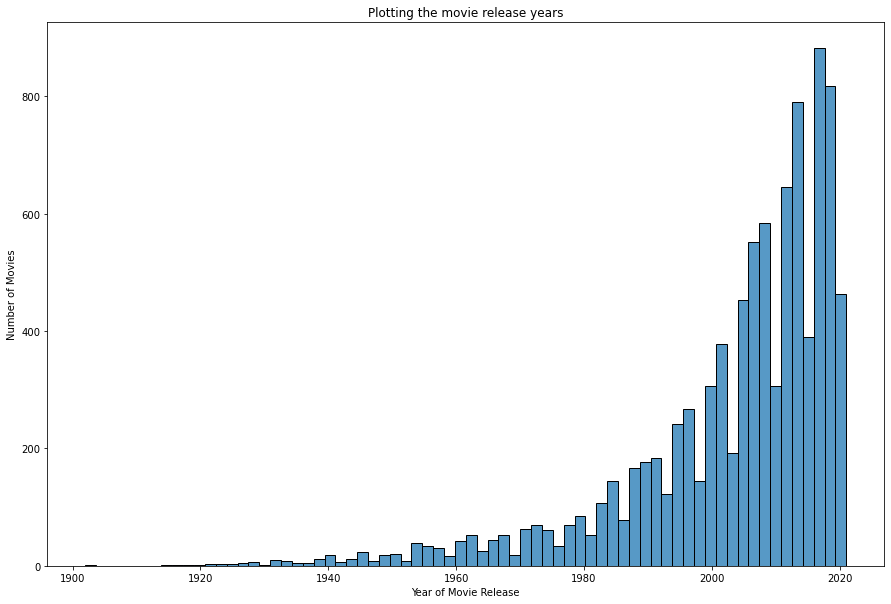

In [7]:
### PLOTTING THE MOVIE RELEASE YEARS
plt.figure(figsize = (15, 10))
sns.histplot(x = 'release_year', data = df)
plt.title('Plotting the movie release years')
plt.xlabel('Year of Movie Release')
plt.ylabel('Number of Movies')
plt.show()

We see that majority of the movies in the dataset were released after the year 2000. Now let us create a new feature from this column by taking the decade of release as bins.

In [8]:
### BINNING THE YEAR OF MOVIE RELEASE INTO DECADES
df['release_year_bins'] = pd.cut(df['release_year'], 
                                 bins = [1900, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030],
                                labels = ['Pre 1920s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', 
                                          '1990s', '2000s', '2010s', '2020s'], right = False)
df

,id,original_language,overview,popularity,title,vote_average,vote_count,genre_1,genre_2,director,actor_1,actor_2,actor_3,actor_4,actor_5,vote_score_bins,release_year,release_year_bins
0,19404,hi,"Raj is a rich, carefree, happy-go-lucky second...",24.222,Dilwale Dulhania Le Jayenge,8.7,3253,Comedy,Drama,Aditya Chopra,Shah Rukh Khan,Kajol,Amrish Puri,Anupam Kher,Satish Shah,A,1995,1990s
1,278,en,Framed in the 1940s for the double murder of h...,67.359,The Shawshank Redemption,8.7,20172,Drama,Crime,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,Clancy Brown,A,1994,1990s
2,238,en,"Spanning the years 1945 to 1955, a chronicle o...",62.603,The Godfather,8.7,15112,Drama,Crime,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Robert Duvall,Richard S. Castellano,A,1972,1970s
3,724089,en,Professor Gabriel Emerson finally learns the t...,10.796,Gabriels Inferno Part II,8.7,1334,Romance,None,Tosca Musk,Melanie Zanetti,Giulio Berruti,James Andrew Fraser,Margaux Brooke,Agnes Albright,A,2020,2020s
4,761053,en,The final part of the film adaption of the ero...,34.804,Gabriels Inferno Part III,8.6,901,Romance,Comedy,Tosca Musk,Melanie Zanetti,Giulio Berruti,Rhett Wellington,James Andrew Fraser,Margaux Brooke,A,2020,2020s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,12142,en,Edward Carnby is a private investigator specia...,14.365,Alone in the Dark,3.2,429,Action,Fantasy,Uwe Boll,Christian Slater,Tara Reid,Stephen Dorff,Will Sanderson,Ona Grauer,F,2005,2000s
9356,5491,en,"In the year 3000, man is no match for the Psyc...",8.795,Battlefield Earth,3.2,621,Action,Adventure,Roger Christian,John Travolta,Barry Pepper,Forest Whitaker,Kim Coates,Sabine Karsenti,F,2000,2000s
9357,11059,en,"Set on an island off the coast, a techno rave ...",10.019,House of the Dead,3.2,280,Horror,Action,Uwe Boll,Jonathan Cherry,Tyron Leitso,Clint Howard,Ona Grauer,Michael Eklund,F,2003,2000s
9358,14164,en,The young warrior Son Goku sets out on a quest...,50.279,Dragonball Evolution,2.9,1567,Action,Adventure,James Wong,Justin Chatwin,Chow Yun-Fat,Joon Park,Jamie Chung,Emmy Rossum,G,2009,2000s


### c) Plot Summary

Next, we shall consider using the feature _'overview'_ in our model but first we must clean the text provided in the plot summary. For this, we start by making a function _preprocess_ which will take each summary and then remove all punctuations, drop all numerical characters, turn each word into lower case and then remove any white spaces left behind after previous removals. The function will then take each word and lemmatize it, provided it is not a stop word, and then join the words to return a clean version of the overview.

In [9]:
### CREATING A FUNCTION TO CLEAN PLOT SUMMARY
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
def preprocess(text):
  clean = []
  text = str(text)
  text = re.sub(r'[^\w\s]+', '', text) #removes punctuation
  text = re.sub('\d+', '', text) #removes numerical characters
  text = text.lower() #turns to lower case
  text = text.strip() #removes white spaces
  for word in text.split():
    if word not in stop_words: #filters words that are not stopwords
      word = lemmatizer.lemmatize(word) #lemmatize the words
      clean.append(word)
  clean = ' '.join(clean) #joins to form clean summary
  return clean

Now, lets apply this function to the overview of each movie.

In [10]:
### APPLYING THE FUNCTION TO OVERVIEW
df['overview'] = df['overview'].apply(preprocess)
df

,id,original_language,overview,popularity,title,vote_average,vote_count,genre_1,genre_2,director,actor_1,actor_2,actor_3,actor_4,actor_5,vote_score_bins,release_year,release_year_bins
0,19404,hi,raj rich carefree happygolucky second generati...,24.222,Dilwale Dulhania Le Jayenge,8.7,3253,Comedy,Drama,Aditya Chopra,Shah Rukh Khan,Kajol,Amrish Puri,Anupam Kher,Satish Shah,A,1995,1990s
1,278,en,framed double murder wife lover upstanding ban...,67.359,The Shawshank Redemption,8.7,20172,Drama,Crime,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,Clancy Brown,A,1994,1990s
2,238,en,spanning year chronicle fictional italianameri...,62.603,The Godfather,8.7,15112,Drama,Crime,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Robert Duvall,Richard S. Castellano,A,1972,1970s
3,724089,en,professor gabriel emerson finally learns truth...,10.796,Gabriels Inferno Part II,8.7,1334,Romance,None,Tosca Musk,Melanie Zanetti,Giulio Berruti,James Andrew Fraser,Margaux Brooke,Agnes Albright,A,2020,2020s
4,761053,en,final part film adaption erotic romance novel ...,34.804,Gabriels Inferno Part III,8.6,901,Romance,Comedy,Tosca Musk,Melanie Zanetti,Giulio Berruti,Rhett Wellington,James Andrew Fraser,Margaux Brooke,A,2020,2020s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,12142,en,edward carnby private investigator specializin...,14.365,Alone in the Dark,3.2,429,Action,Fantasy,Uwe Boll,Christian Slater,Tara Reid,Stephen Dorff,Will Sanderson,Ona Grauer,F,2005,2000s
9356,5491,en,year man match psychlos greedy manipulative ra...,8.795,Battlefield Earth,3.2,621,Action,Adventure,Roger Christian,John Travolta,Barry Pepper,Forest Whitaker,Kim Coates,Sabine Karsenti,F,2000,2000s
9357,11059,en,set island coast techno rave party attracts di...,10.019,House of the Dead,3.2,280,Horror,Action,Uwe Boll,Jonathan Cherry,Tyron Leitso,Clint Howard,Ona Grauer,Michael Eklund,F,2003,2000s
9358,14164,en,young warrior son goku set quest racing time v...,50.279,Dragonball Evolution,2.9,1567,Action,Adventure,James Wong,Justin Chatwin,Chow Yun-Fat,Joon Park,Jamie Chung,Emmy Rossum,G,2009,2000s


## 4. Creating a Combined Feature

Just like we did with our first model, in order to get similarity scores for movies, we first need to create a feature that is a combination of other features in the dataframe. To get better results than our previous model, here, we shall consider more descriptive features in the combined feature; thus along with the features that we had considered previously, this time, we will also include _'vote_score_bins'_ and _'overview'_ such that when we feed a movie to our new model, along with possibly sharing the same language, genre, cast and director, the next recommended movie will also have a similar average voting score and plot summary.

In [11]:
### COMBINING FEATURES FOR SIMILARITY SCORES
def combine_features(data):
    return data['title'] + ' ' + data['original_language'] + ' ' + data['genre_1'] + ' ' + data['genre_2'] + ' ' + data['vote_score_bins'] + ' ' + data['overview'] + ' '+ data['director'] + ' ' + data['actor_1'] + ' ' + data['actor_2'] + ' ' + data['actor_3'] + ' ' + data['actor_4'] + ' ' + data['actor_5'] 
df['combined_features'] = df.apply(combine_features, axis = 1)
df

,id,original_language,overview,popularity,title,vote_average,vote_count,genre_1,genre_2,director,actor_1,actor_2,actor_3,actor_4,actor_5,vote_score_bins,release_year,release_year_bins,combined_features
0,19404,hi,raj rich carefree happygolucky second generati...,24.222,Dilwale Dulhania Le Jayenge,8.7,3253,Comedy,Drama,Aditya Chopra,Shah Rukh Khan,Kajol,Amrish Puri,Anupam Kher,Satish Shah,A,1995,1990s,Dilwale Dulhania Le Jayenge hi Comedy Drama A ...
1,278,en,framed double murder wife lover upstanding ban...,67.359,The Shawshank Redemption,8.7,20172,Drama,Crime,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,Clancy Brown,A,1994,1990s,The Shawshank Redemption en Drama Crime A fram...
2,238,en,spanning year chronicle fictional italianameri...,62.603,The Godfather,8.7,15112,Drama,Crime,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Robert Duvall,Richard S. Castellano,A,1972,1970s,The Godfather en Drama Crime A spanning year c...
3,724089,en,professor gabriel emerson finally learns truth...,10.796,Gabriels Inferno Part II,8.7,1334,Romance,None,Tosca Musk,Melanie Zanetti,Giulio Berruti,James Andrew Fraser,Margaux Brooke,Agnes Albright,A,2020,2020s,Gabriels Inferno Part II en Romance None A pro...
4,761053,en,final part film adaption erotic romance novel ...,34.804,Gabriels Inferno Part III,8.6,901,Romance,Comedy,Tosca Musk,Melanie Zanetti,Giulio Berruti,Rhett Wellington,James Andrew Fraser,Margaux Brooke,A,2020,2020s,Gabriels Inferno Part III en Romance Comedy A ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,12142,en,edward carnby private investigator specializin...,14.365,Alone in the Dark,3.2,429,Action,Fantasy,Uwe Boll,Christian Slater,Tara Reid,Stephen Dorff,Will Sanderson,Ona Grauer,F,2005,2000s,Alone in the Dark en Action Fantasy F edward c...
9356,5491,en,year man match psychlos greedy manipulative ra...,8.795,Battlefield Earth,3.2,621,Action,Adventure,Roger Christian,John Travolta,Barry Pepper,Forest Whitaker,Kim Coates,Sabine Karsenti,F,2000,2000s,Battlefield Earth en Action Adventure F year m...
9357,11059,en,set island coast techno rave party attracts di...,10.019,House of the Dead,3.2,280,Horror,Action,Uwe Boll,Jonathan Cherry,Tyron Leitso,Clint Howard,Ona Grauer,Michael Eklund,F,2003,2000s,House of the Dead en Horror Action F set islan...
9358,14164,en,young warrior son goku set quest racing time v...,50.279,Dragonball Evolution,2.9,1567,Action,Adventure,James Wong,Justin Chatwin,Chow Yun-Fat,Joon Park,Jamie Chung,Emmy Rossum,G,2009,2000s,Dragonball Evolution en Action Adventure G you...


## 5. Calculating Similarity Scores and Creating Other Functions

Here after, we shall follow the same steps like with our last model by creating two functions for easy flow, calculating similarity scores and creating a function that returns 20 movie recommendations.

In [12]:
### CALCULATING AND CREATING ESSENTIAL FUNCTIONS
def get_id_from_title(title):
    return df[df['title'] == title]['id'].values[0]

def get_title_from_id(movie_id):
        return tmdb_movies[tmdb_movies['id'] == movie_id]['title'].values[0]
    
vectorizer = CountVectorizer()
count = vectorizer.fit_transform(df['combined_features'])
similarity = cosine_similarity(count)

def get_recommendations(movie_user):
    movie_user = re.sub(r'[^\w\s]+', '', movie_user)
    movie_index = get_id_from_title(movie_user) 
    df_similarity = pd.DataFrame(similarity[df[df['id'] == movie_index].index].reshape(-1, 1), columns = ['cosine_similarity'])
    df_similarity['id'] = df['id']
    df_similarity = df_similarity.sort_values(by = 'cosine_similarity', ascending = False, ignore_index = True)
    for movie in range(1, 21):
        movie_id = df_similarity['id'][movie]
        print(get_title_from_id(movie_id))

## 6. Getting Movie Recommendations I

We now feed in _Spider-Man_ as the movie we want to get recommendations for. 

In [13]:
get_recommendations('Spider-Man')

Spider-Man 3
Spider-Man 2
The Amazing Spider-Man
Spider-Man: Homecoming
The Amazing Spider-Man 2
Spider-Man: Into the Spider-Verse
21 Jump Street
Kick-Ass
The Assassination of Jesse James by the Coward Robert Ford
Spider-Man: Far From Home
Mac & Devin Go to High School
The Substitute
Here Comes the Boom
Lemonade Mouth
Pump Up the Volume
Bachelorette
Brothers
Fame
The Virgin Suicides
Detachment


We see that along with the movies from the Raimi Trilogy, this model also recommends other Spider-Man movies. Thus, it does much better than the previous model.

## 7. Getting Movie Recommendations II

Let us now try to get recommendations for _The Dark Knight_.

In [14]:
get_recommendations('The Dark Knight')

The Dark Knight Rises
Batman Begins
Batman: The Dark Knight Returns, Part 1
Batman: The Long Halloween, Part Two
Batman: Mask of the Phantasm
Batman: The Long Halloween, Part One
Batman Forever
Batman: The Dark Knight Returns, Part 2
Batman
Batman: The Killing Joke
Batman: Gotham by Gaslight
Batman: Gotham Knight
Batman Returns
The Prestige
The Pledge
The Cook, the Thief, His Wife & Her Lover
Batman: Death in the Family
Batman: Under the Red Hood
This Must Be the Place
JFK


In addition to the rest of the movies in the Nolan Trilogy, the model recommends lots of other Batman movies. Thus, we can say that this model is better than the previous one.